# Applied Data Science 1
### Dr. William Cooper
# Clustering

Clustering is all about finding subsets of data which behave in the same way.
That means groups acting **similar** to other members in that group *and* **dissimilar** to other groups.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [3]:
# make some clustered data
# define centres of three clusters
centres = np.array([[-1., 0.], [1., -0.5], [0., 1.]])
xcent = centres[:, 0]
ycent = centres[:, 1]
# Points are normal distibuted around the centres.
xy, nclust = make_blobs(1000, centers=centres, cluster_std=0.3)
x = xy[:,0]
y = xy[:,1]

In [4]:
# creating a custom colormap for plotting
from matplotlib.colors import ListedColormap
colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(nclust))))
cmap = ListedColormap(colours)

In [5]:
def plot_clusters():
    """
    Plots clustered data as a scatter plot
    """
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(x, y, c=nclust, cmap=cmap, marker='o')
    ax.plot(xcent, ycent, 'kD', ms=10) 

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(nclust))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    return

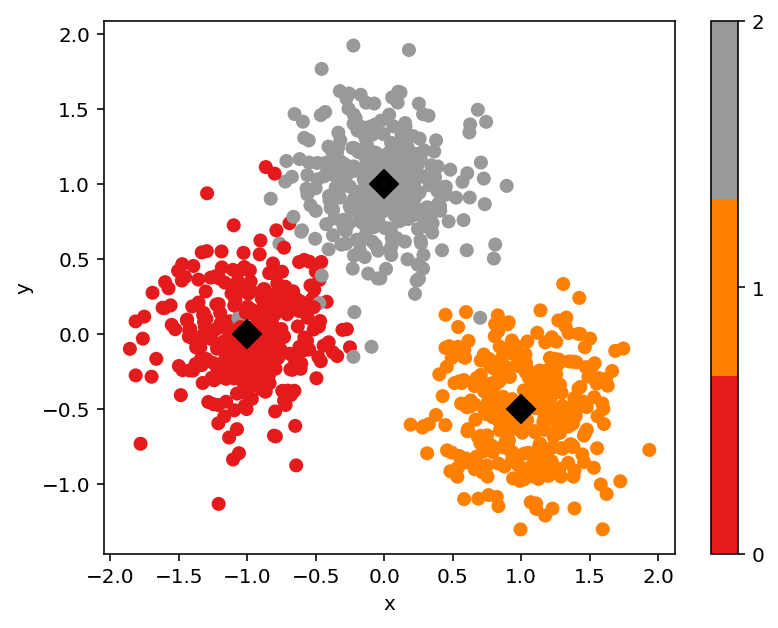

In [6]:
plot_clusters()

## Clustering algorithms
### k-means

- k-means attempts to partition the samples into k clusters.
- Define a set of cluster centres
  $$\mathbf{S} = {S_1, S_2, S_3, \ldots S_k}$$
  each having coordinates $(S_{1,x}, S_{2,y})$
- One needs to measure the distance to the cluster centre. Usually the squares of the Euclidean distance in vector space is used: $$(\mathbf{X} - \mathbf{S_i})^2$$
- To minimise this:  $$\min \sum_{i=1}^k \sum_{X \in S_i} (X-S_i)^2$$
 with $S_i$ beginning the vector average over $X \in S_i$
- This is an iterative process:

Implementation:
- visualise the data
- guess the number of clusters (humans are good at this!)
- set-up the clusterer
- run the algorithm
- visualise and verify result
- possibly try another number of clusters

In [8]:
ncluster = 3
# set up the clusterer with the number of expected clusters (by eye)
# kmeans starts with a random seed and repeats the clustering n_init times.
kmeans = KMeans(n_clusters=ncluster, n_init=20)

# Fit the data, results are stored in the kmeans object
kmeans.fit(xy)     # fit done on x,y pairs

labels = kmeans.labels_  # the group for each fitted point
    
# the estimated cluster centres
cen = kmeans.cluster_centers_
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]

In [9]:
def plot_fitted_clusters():
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(x, y, c=nclust, cmap=cmap, marker='o', label='Data')
    ax.plot(xcent, ycent, 'kD', ms=10, label='True Centres') 

    ax.plot(xkmeans, ykmeans, 'bs', ms=10, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(nclust))
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    return

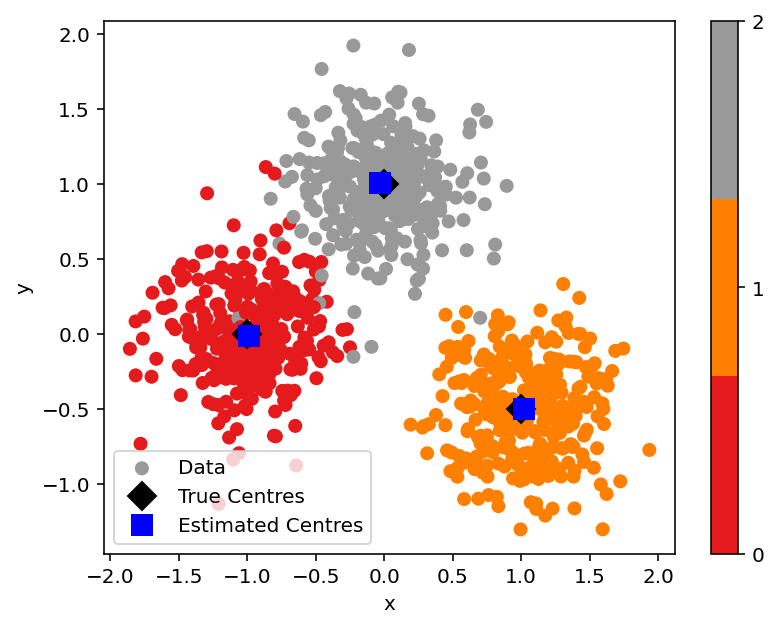

In [10]:
plot_fitted_clusters()

In [11]:
# can then predict for new, unseen data
# note this sklearn terminology, it is consistent throughout other techniques
kmeans.predict([[0.5, 0.5]])[0]

2

### What is the right number of clusters? The silhoutte score
The silhoutte score compares how close data points are *within* a cluster and the separation *between* clusters.

**Cohesion** measures closeness of points within a cluster by summing up the distance of points of one cluster to its centre.

$$C(c_i) = \sum_{p\in C(c_i)} d(p, c_i)^2\hspace{2cm}$$ 
with $p = (x, y)$ and $c_i = (x^{\mathrm{cen}}_i, y^{\mathrm{cen}}_i)$.

**Separation** measures how well clusters are segregated from each other

$$S(c_i, c_j) = d(c_i, c_j)^2$$

**Silhoutte Score** 
- For each data point $p_i$ in cluster $c_j$, calculate $a_i$ as the average distance of points in $c_j$.
- Calculate $b_{ij}$ as the average distance of point $p_i$ to points in cluster $c_j$. $b_i$ is then 
$b_i = \min b_{ij}$ i.e., the distance of the closest point in $c_j$ to $p_i$.
The silhoutte of $p_i$ is 

$$s(p_i) = \frac{b_i - a_i}{\max(a_i, b_i)}$$

$s(p_i)$ takes on values between $-1$ and 1. Ideally, the distance to other points *within* the cluster ($a_i$) is small and the separation to *other* clusters is large, i.e., $s(p_i)$ close to 1.

In [13]:
silhouette_score(xy, labels)

0.641191771634696

In [14]:
def one_silhoutte(n, xy):
    """ 
    Calculates the silhoutte score for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)

    return score

In [15]:
# can automate the looking at cluster numbers (beware computational time)
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score = one_silhoutte(n, xy)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.56
 3 clusters silhoutte score = 0.64
 4 clusters silhoutte score = 0.52
 5 clusters silhoutte score = 0.42
 6 clusters silhoutte score = 0.33
 7 clusters silhoutte score = 0.34
 8 clusters silhoutte score = 0.34
 9 clusters silhoutte score = 0.34
10 clusters silhoutte score = 0.34
Best number of clusters =  3


### The Elbow Method
Alternatively, to be viewed graphically, we can compute the elbow method.
This involves computing the Sum of the Squared Errors (SSE).
In `sklearn`, this is referred to as `inertia`, or the sum of the distances of each sample to it's assigned cluster centre (sometimes called Within-Cluster Sum of Square - WCSS).
$$\text{WCSS} = \sum{(x_i - c_i)^2}$$
We are looking for the point at which you start getting diminishing returns on increasing $k$.

In [17]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

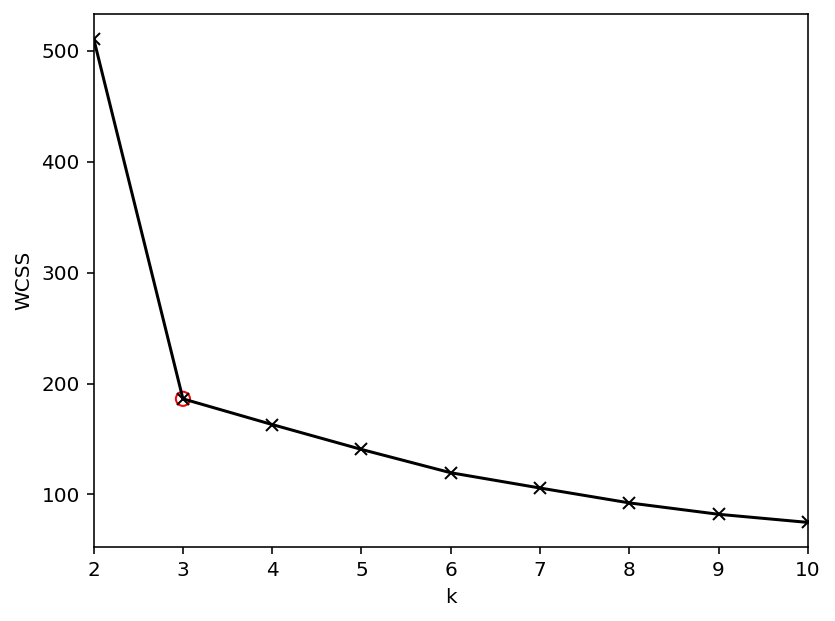

In [18]:
wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    wcss.append(kmeans.inertia_)

plot_elbow_method(2, 10, wcss, best_n)

In [19]:
# Looking at some real data, where we don't know the number of clusters already
df_eu = pd.read_csv('Data/EU_countries.csv', index_col='Country').dropna()
for col in df_eu.columns:
    df_eu[col] = pd.to_numeric(df_eu[col])

FileNotFoundError: [Errno 2] No such file or directory: 'Data/EU_countries.csv'

Very important to look at the data before choosing what should be clustered.
Highly correlated data is **not** suitable for clustering!

In [ ]:
sns.pairplot(df_eu, corner=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(dpi=144)
mask = np.triu(np.ones_like(df_eu.corr()))
sns.heatmap(df_eu.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
plt.show()

We could look at population versus area as that is not *too* highly correlated.
Alternatively, throwing all data into `kmeans` is an option, but would produce some very confusing results to interpret.

**Problem:** Values are different by orders of magnitude. 
The Euclidean distance will be dominated by population.
To solve this, we can rescale to make data similar in size.

Sklearn offers three scalers:
- `MinMaxScaler` scales to $[0, 1]$
- `StandardScaler` uses the mean and standard deviation for scaling
- `RobustScaler` uses the median and 25%-75% quartiles. 
The robust scaler is to be preferred if values are not normally distributed - as in this case.

In [ ]:
from sklearn.preprocessing import RobustScaler
df_clust = df_eu[['Population', 'Area']].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)

In [ ]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [ ]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

So, silhoutte score would suggest 2 or 3 clusters (the values are not too dissimilar) whereas the elbow method suggest more like 5 or 6 clusters.
Best thing to do is to look at the actual data!

In [ ]:
def plot_fitted_population_area(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', label='Data')

    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x', s=100, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('Population')
    ax.set_ylabel('Area')
    ax.set_xscale('log')
    plt.show()
    return

In [ ]:
inv_norm = scaler.inverse_transform(norm)  # this is important for plotting data accurately
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_population_area(labels, inv_norm, xkmeans, ykmeans, cenlabels)

As with most real data science, the results are arguable and really depends on the exact details in the data.
Note the use of `inverse_transform` to actually plot the data and estimated cluster centres in the original form, pre-scaling.

Data $\rightarrow$ Scaling $\rightarrow$ Clustering $\rightarrow$ Inverse Scaling $\rightarrow$ Plotting.

With looking at datasets like this, a logical approach to fairly compare different groups is to remove trivial correlations like population and area.
For example, GDP per capita (dividing by population) or population per km$^2$.

# Exercise 1
Take the `fish_measurements` file and determine: a) some suitable sub-set of data to be clustered, b) an appropriate number of clusters and c) plot these clusters. 
Don't forget the pre-processing steps required, including ensuring the data is numeric and scaled logically.

In [ ]:
df_fish = pd.read_csv('')
df_fish.head()

In [ ]:
fig, ax = plt.subplots(dpi=144)
plt.show()

In [ ]:
from sklearn.preprocessing import 
df_cut = df_fish[[]].copy()

In [ ]:
def plot_fitted_fish():
    plt.show()
    return

## End Exercise 1